In [1]:
from datetime import datetime

import pandas as pd
%matplotlib notebook

from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('wfo_wfh_data.csv', parse_dates=True, index_col='date')
df = df.asfreq('D')

In [3]:
df['total'] = df.wfo + df.wfh
df['pct_wfo'] = (df.wfo / df.total) * 100
df['pct_wfh'] = (df.wfh / df.total) * 100

In [4]:
df.head()

,wfo,wfh,other,total,pct_wfo,pct_wfh
date,,,,,,
2020-01-30,17.0,4.0,0.0,21.0,80.952381,19.047619
2020-01-31,7.0,17.0,1.0,24.0,29.166667,70.833333
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,14.0,5.0,1.0,19.0,73.684211,26.315789


<IPython.core.display.Javascript object>


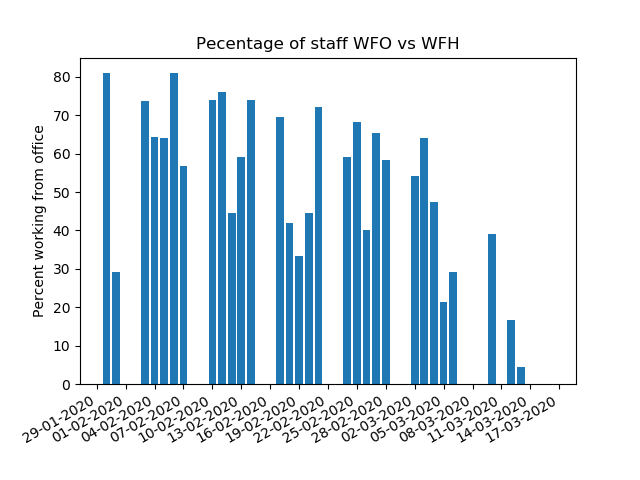

In [5]:
plt.figure()
plt.bar(df.index, df.pct_wfo)
ax = plt.gca()
ax.set_title('Pecentage of staff WFO vs WFH')

ax.set_ylabel('Percent working from office')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


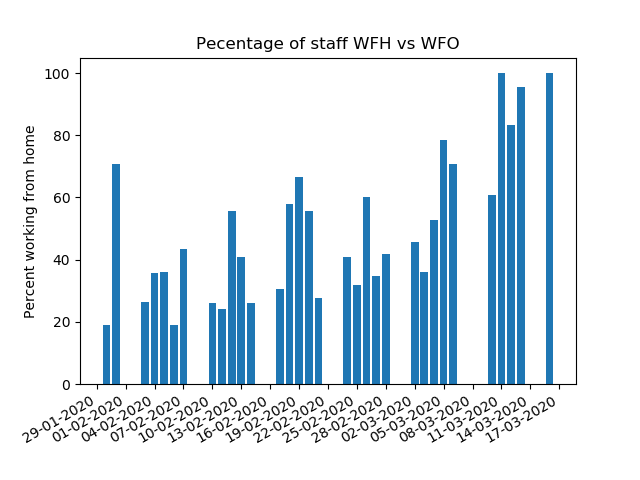

In [6]:
plt.figure()
plt.bar(df.index, df.pct_wfh)
ax = plt.gca()
ax.set_title('Pecentage of staff WFH vs WFO')

ax.set_ylabel('Percent working from home')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.show()

<IPython.core.display.Javascript object>


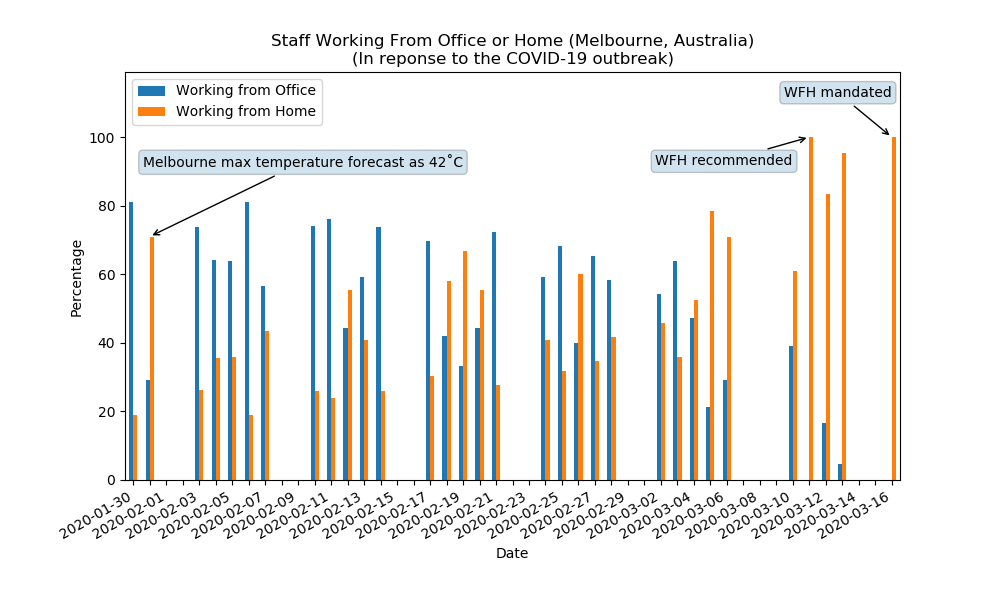

In [7]:
ig = plt.figure(figsize=(10, 6))

ax = plt.gca()
df[["pct_wfo", "pct_wfh"]].plot(kind="bar", ax=ax)

date_labels = [s for s in map(lambda dt: dt.strftime("%Y-%m-%d"), df.index)]
date_labels[1::2] = [None] * len(date_labels[1::2])

ax.set_xticklabels(date_labels)
ax.set_title(
    "Staff Working From Office or Home (Melbourne, Australia)\n(In reponse to the COVID-19 outbreak)"
)

ax.set_ylim(0, 119)
ax.set_ylabel("Percentage")
ax.set_xlabel("Date")

ax.annotate(
    "Melbourne max temperature forecast as 42˚C",
    xy=(1, 71),
    xytext=(20, 95),
    va="top",
    ha="right",
    bbox=dict(boxstyle="round", alpha=0.2),
    arrowprops=dict(arrowstyle="->",),
)

ax.annotate(
    "WFH recommended",
    xy=(41, 100),
    xytext=(40, 95),
    va="top",
    ha="right",
    bbox=dict(boxstyle="round", alpha=0.2),
    arrowprops=dict(arrowstyle="->",),
)


ax.annotate(
    "WFH mandated",
    xy=(46, 100),
    xytext=(46, 115),
    va="top",
    ha="right",
    bbox=dict(boxstyle="round", alpha=0.2),
    arrowprops=dict(arrowstyle="->",),
)

ax.legend(["Working from Office", "Working from Home"], loc="upper left")

plt.gcf().autofmt_xdate()

In [8]:
daily_means = df.groupby(df.index.dayofweek).mean()
daily_means.index = list(map(lambda dt: {0:"Monday", 1:"Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}[dt], daily_means.index))
daily_means

,wfo,wfh,other,total,pct_wfo,pct_wfh
Monday,12.666667,9.833333,0.666667,22.500000,55.096846,44.903154
Tuesday,15.000000,10.666667,0.333333,25.666667,58.922242,41.077758
Wednesday,8.666667,13.833333,1.000000,22.500000,38.191033,61.808967
Thursday,11.428571,10.285714,0.857143,21.714286,52.702853,47.297147
Friday,10.857143,12.714286,1.285714,23.571429,46.287722,53.712278
Saturday,NaN,NaN,NaN,NaN,NaN,NaN
Sunday,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import seaborn as sns

<IPython.core.display.Javascript object>


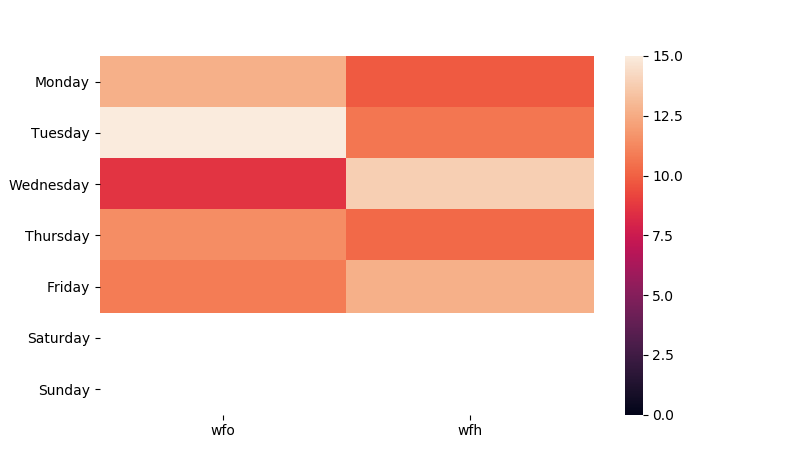

In [10]:
sns.heatmap(daily_means[['wfo', 'wfh']],0)

In [11]:
df.groupby(df.index.weekofyear).mean()

,wfo,wfh,other,total,pct_wfo,pct_wfh
date,,,,,,
5,12.00,10.50,0.50,22.5,55.059524,44.940476
6,16.40,8.20,0.40,24.6,67.917794,32.082206
7,16.20,8.60,0.20,24.8,65.504494,34.495506
8,11.40,10.80,1.40,22.2,52.300140,47.699860
9,13.40,9.40,1.20,22.8,58.198135,41.801865
10,9.60,11.60,0.60,21.2,43.226065,56.773935
11,3.75,20.75,1.25,24.5,15.085639,84.914361
12,0.00,20.00,2.00,20.0,0.000000,100.000000
